In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.preprocessing import MinMaxScaler

2023-03-30 20:27:58.826018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
d_train = pd.read_csv('/Users/kaiding/Documents/MIDS/W207 Machine Learning/forest-cover-type-prediction (1)/train.csv')

In [3]:
pd.set_option('display.max_columns', None)
d_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
# No Missing values
# From column "Wilderness_Area", everything is dummy/indicator variable.
pd.set_option('display.max_columns', None)
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

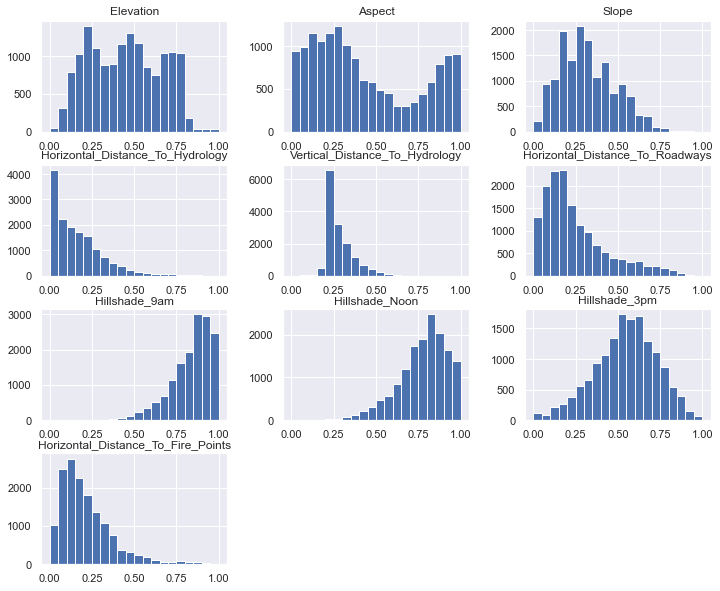

In [5]:
numeric_columns = ['Elevation', 'Aspect', 'Slope',
'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

non_soil_columns = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']

X_train = d_train.copy()
y_train = X_train.pop("Cover_Type")

# Standardize the numerical columns
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

#numeric columns distribution
#Forest cover type (1-7 evenly distributed with 2160 each) - No rare types
X_train[numeric_columns].hist(figsize=(12,10),bins=20)
plt.show()

In [6]:
#Per above data summary, Soil_Type7 and Soil_Type15 do not have any values, so let's drop them.
#Let's also drop Id column
X_train = X_train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1)

#Scale data for easier input into model
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled, columns = X_train.columns)
X_train_scaled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0.374622,0.675000,0.442308,0.192107,0.218571,0.095791,0.669291,0.980645,0.862903,0.183326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15116,0.372608,0.336111,0.365385,0.471333,0.487143,0.089695,0.980315,0.787097,0.366935,0.189475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15117,0.316717,0.372222,0.480769,0.271780,0.375714,0.048621,0.984252,0.780645,0.334677,0.169741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15118,0.314199,0.463889,0.538462,0.162323,0.352857,0.035123,0.901575,0.890323,0.479839,0.133276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

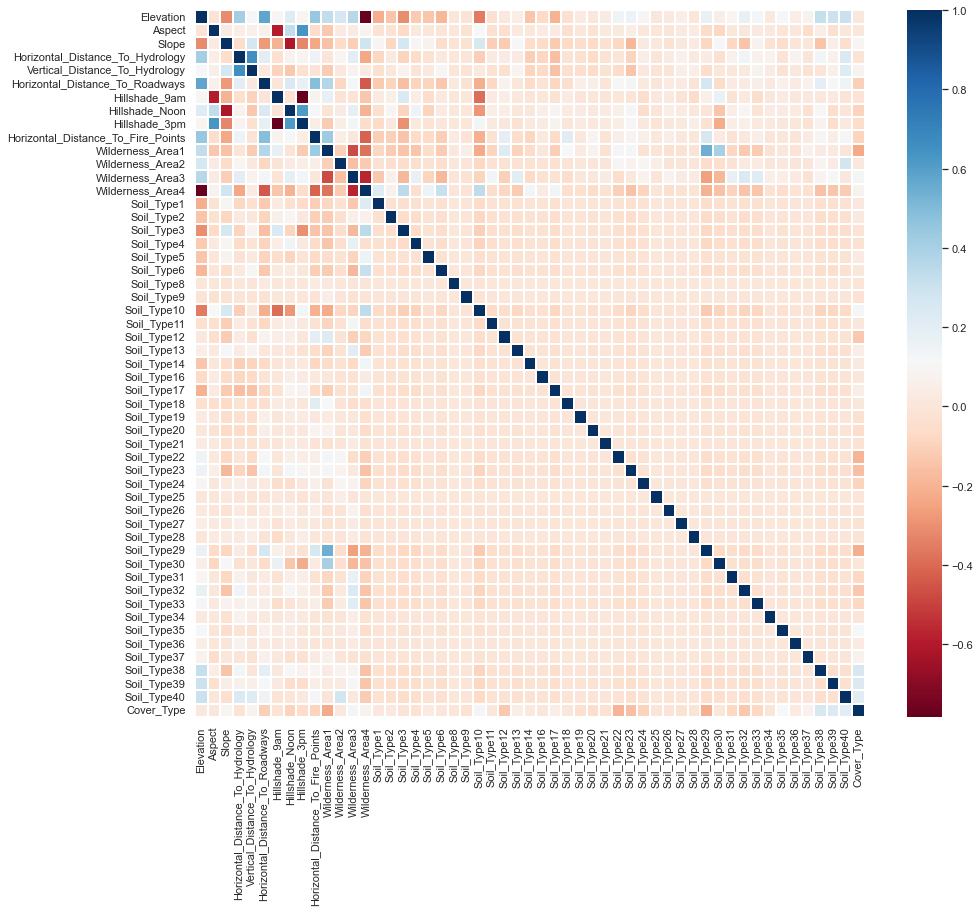

In [7]:
# Check correlation of all variables with target variable
# All soil types individually have very weak correlation with target variable, so let's try combine them
plt.figure(figsize=(15,13))
all_cols_df = d_train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1)
corr = all_cols_df.corr()
sns.heatmap(corr, linewidths=0.1,cmap=plt.cm.RdBu,annot=False, fmt='.2f')

<AxesSubplot:>

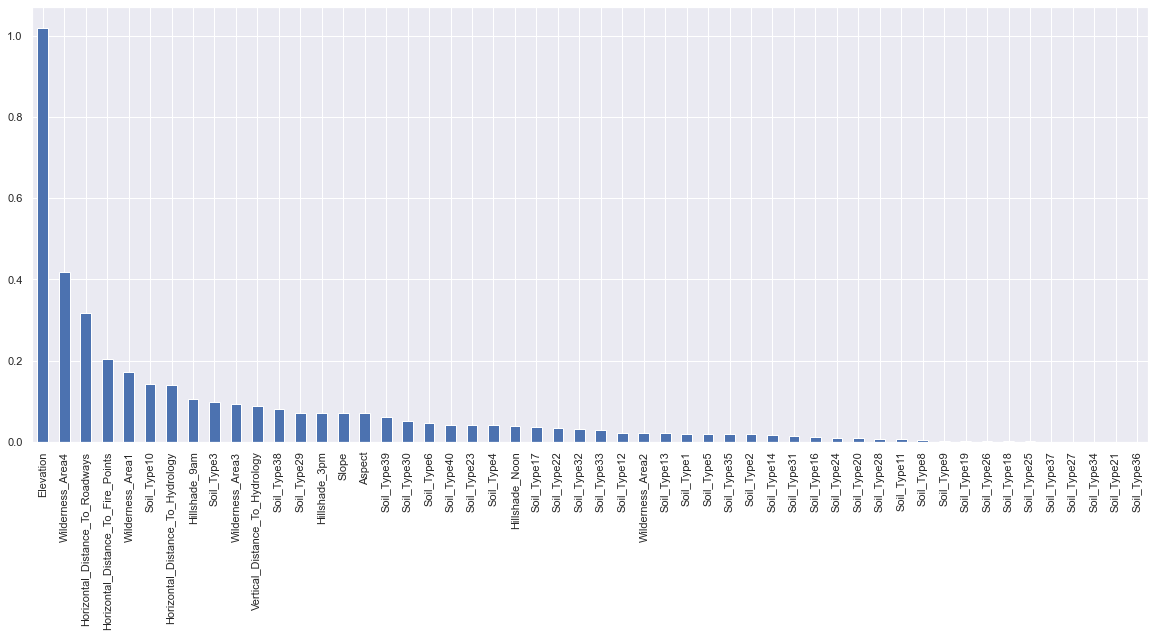

In [8]:
# Initial look at feature importance
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

<AxesSubplot:>

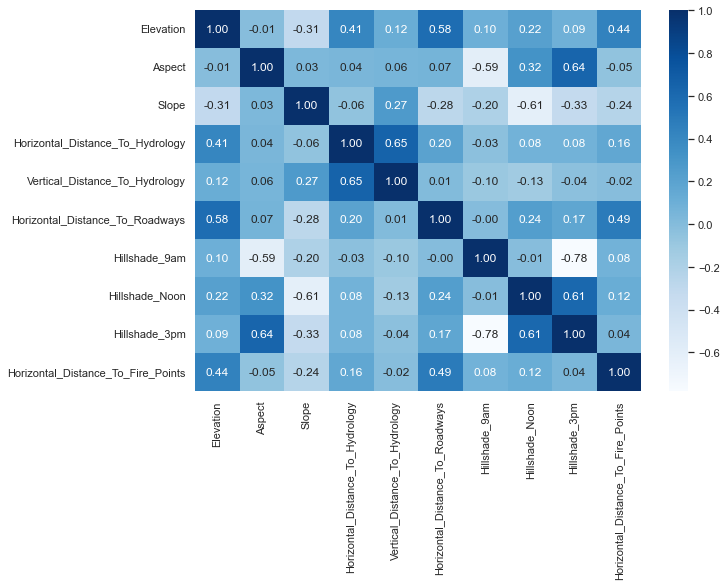

In [10]:
#Check correlations across numerical values
plt.figure(figsize=(10,7))
corr = d_train[numeric_columns].corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')

In [28]:
# Identify highly correlated numerical variables
# Vertical and horizontal distance to hydrology (0.65)
# Hillshade 3am and Hillshae 9pm are colinear (-0.77)
# Elevation and wilderness 4 are highly related (-0.78)

# Low-hanging fruit, combine vertical and horitontal distance to hydrology
# Also drop one of Hillshade 3am/9pm - Drop the less importance Hillshade 3pm based on MI score
X_train_new_features = X_train.copy()
X_train_new_features["Euclid_Dist_To_Hydro"] = (X_train['Horizontal_Distance_To_Hydrology']**2 + X_train['Vertical_Distance_To_Hydrology']**2)**0.5
X_train_new_features["Slope_Hydro"] =  X_train_new_features["Vertical_Distance_To_Hydrology"] / X_train["Horizontal_Distance_To_Hydrology"]
X_train_new_features['Slope_Hydro'] = X_train_new_features['Slope_Hydro'].apply(lambda x: 0 if np.isinf(x) else x)
#X_train_soil_numeric.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)
X_train_new_features.drop(['Hillshade_3pm'],axis=1,inplace=True)

X_train_new_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Euclid_Dist_To_Hydro,Slope_Hydro
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.897898,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.283562,1.085703
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.890176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.254791,1.266981
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.875304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.361498,1.510517
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.888174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.417979,2.092987
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.882597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.236404,1.818254


In [29]:
# Create distance to amenties between the 3 horizontal distances variables ~0.2 correlation
# Firepoints and Roadways already 0.49 corr so do not create linear combination

X_train_new_features["Avg_Dist_Hydrology_Roadways"] = (X_train_new_features["Horizontal_Distance_To_Hydrology"] + X_train_new_features["Horizontal_Distance_To_Roadways"])/2
X_train_new_features["Avg_Dist_Hydrology_Firepoints"] = (X_train_new_features["Horizontal_Distance_To_Hydrology"] + X_train_new_features["Horizontal_Distance_To_Fire_Points"])/2


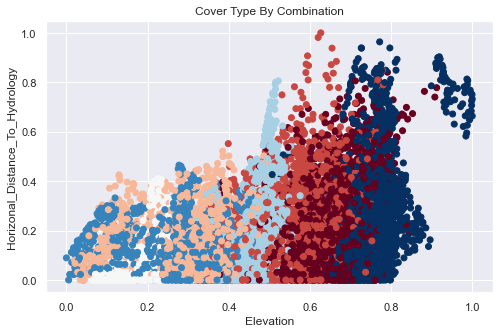

In [30]:
# Elevation has a fairly strong correlation with the 3 horizontal distance variables (0.4+)
# For Random Forest/Tree-based algorithms, try creating combinations of Elevation and the 3 variables

# First try Elevation & Horizontal to dryo (0.41 correlation)
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Hydrology"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Hydrology")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

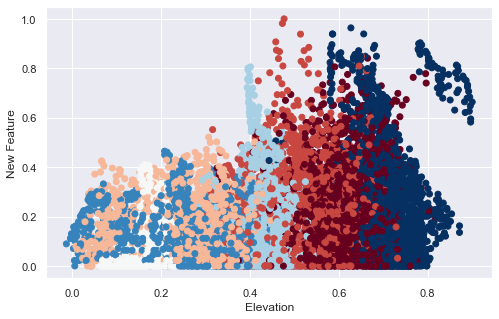

In [31]:
# Creating linear combination for tree algorithm
# Looks like Elevation - 0.15 * Horizontal Hydro makes the cover type linear by new feature
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"]-0.15*X_train_new_features["Horizontal_Distance_To_Hydrology"],X_train_new_features["Horizontal_Distance_To_Hydrology"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("New Feature")
plt.xlabel("Elevation")
plt.show()

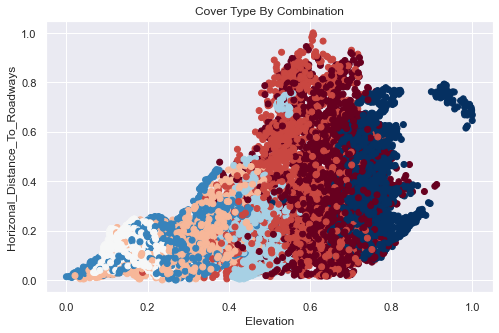

In [32]:
# Elevation & horizontal dist to roadways (0.58 corr)
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Roadways"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Roadways")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

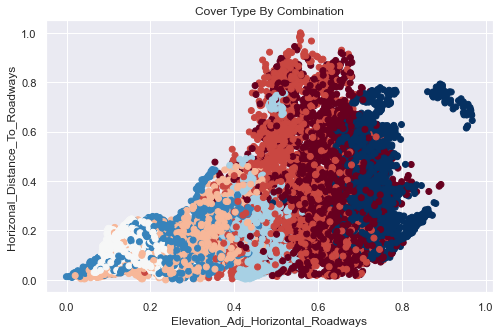

In [33]:
# Elevation - 0.05 * Horizontal_distance_to_roadways seems to make target variable linear vs new feature
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"]-0.05*X_train_new_features["Horizontal_Distance_To_Roadways"],X_train_new_features["Horizontal_Distance_To_Roadways"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Roadways")
plt.xlabel("Elevation_Adj_Horizontal_Roadways")
plt.title("Cover Type By Combination")
plt.show()

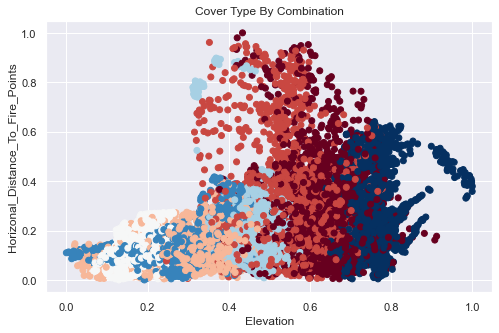

In [34]:
# This looks fine
plt.figure(figsize=(8,5))
plt.scatter(X_train_new_features["Elevation"],X_train_new_features["Horizontal_Distance_To_Fire_Points"],c=d_train['Cover_Type'],cmap=plt.cm.RdBu) 
plt.ylabel("Horizonal_Distance_To_Fire_Points")
plt.xlabel("Elevation")
plt.title("Cover Type By Combination")
plt.show()

In [35]:
# Add 2 new features - Elevation adjusted by horizontal distance to Hydro and Roadways
X_train_new_features['Elevation_Adj_Horizontal_Hydro'] = X_train_new_features["Elevation"] - 0.15*X_train_new_features["Horizontal_Distance_To_Hydrology"]
X_train_new_features['Elevation_Adj_Horizontal_Roadways'] = X_train_new_features["Elevation"] - 0.05*X_train_new_features["Horizontal_Distance_To_Roadways"]

In [37]:
X_train_new_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Euclid_Dist_To_Hydro,Slope_Hydro,Avg_Dist_Hydrology_Roadways,Avg_Dist_Hydrology_Firepoints,Elevation_Adj_Horizontal_Hydro,Elevation_Adj_Horizontal_Roadways
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.897898,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.283562,1.085703,0.133064,0.545003,0.340268,0.365383
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.890176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.254791,1.266981,0.107230,0.524016,0.342384,0.363232
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.875304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.361498,1.510517,0.330546,0.537429,0.443884,0.450740
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.888174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.417979,2.092987,0.314335,0.534184,0.437221,0.441826
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.882597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.236404,1.818254,0.085336,0.498260,0.351491,0.365743


In [55]:
#Based on above correlation matrix, we could try to combine some of the features which have high correlations.

X_train_tighter = X_train_scaled.copy()

#Combine Vertical and Horizontal Distance to hydrology via Euclidian distance
X_train_tighter['Triangular_Dist_To_Hydro'] = (X_train_tighter['Horizontal_Distance_To_Hydrology']**2 + X_train_tighter['Vertical_Distance_To_Hydrology']**2)**0.5
X_train_tighter = X_train_tighter.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis = 1)

X_train_tighter.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Triangular_Dist_To_Hydro
0,0.369084,0.141667,0.057692,0.074020,0.870079,0.858065,0.596774,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283562
1,0.366062,0.155556,0.038462,0.056604,0.866142,0.877419,0.608871,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254791
2,0.473817,0.386111,0.173077,0.461538,0.921260,0.896774,0.544355,0.875304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.361498
3,0.464250,0.430556,0.346154,0.448476,0.937008,0.896774,0.491935,0.888174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417979
4,0.368580,0.125000,0.038462,0.056749,0.866142,0.870968,0.604839,0.882597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236404


In [56]:
X_train_tighter.shape

(15120, 51)

In [57]:
#Update model build function
def build_my_model(average_over_positions=False,
                           input_size=1000,
                           input_length=20,
                           embedding_dim=2):
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())
  
  #Add my layer
  model.add(tf.keras.layers.Dense(units=1024, activation = 'relu', name = 'relu1'))
  #model.add(tf.keras.layers.Dense(units=256, activation = 'relu', name = 'relu2'))
  model.add(tf.keras.layers.Dense(units=128, activation = 'relu', name = 'relu3'))
  model.add(tf.keras.layers.Dense(units=32, activation = 'relu', name = 'relu4'))
  #model.add(tf.keras.layers.Dense(1024, input_shape = (51,), activation = 'relu', kernel_initializer='he_uniform'))
  #model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.Dense(8, activation='tanh'))

  model.add(tf.keras.layers.Dense(
      units=8,
      activation = tf.keras.activations.softmax
  ))

  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [58]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

Epoch 1/15


2023-03-30 21:00:30.358602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


213/213 [==============================] - 2s 6ms/step - loss: 1.1720 - accuracy: 0.5730 - val_loss: 0.9576 - val_accuracy: 0.6845
Epoch 2/15
213/213 [==============================] - 1s 5ms/step - loss: 0.9064 - accuracy: 0.6548 - val_loss: 0.8115 - val_accuracy: 0.7169
Epoch 3/15
213/213 [==============================] - 1s 5ms/step - loss: 0.8079 - accuracy: 0.6783 - val_loss: 0.8183 - val_accuracy: 0.7116
Epoch 4/15
213/213 [==============================] - 1s 5ms/step - loss: 0.7502 - accuracy: 0.6926 - val_loss: 0.7821 - val_accuracy: 0.7169
Epoch 5/15
213/213 [==============================] - 1s 5ms/step - loss: 0.7176 - accuracy: 0.7015 - val_loss: 0.6810 - val_accuracy: 0.7507
Epoch 6/15
213/213 [==============================] - 1s 5ms/step - loss: 0.6870 - accuracy: 0.7123 - val_loss: 0.6959 - val_accuracy: 0.7302
Epoch 7/15
213/213 [==============================] - 1s 5ms/step - loss: 0.6628 - accuracy: 0.7282 - val_loss: 0.6998 - val_accuracy: 0.7136
Epoch 8/15
213/21

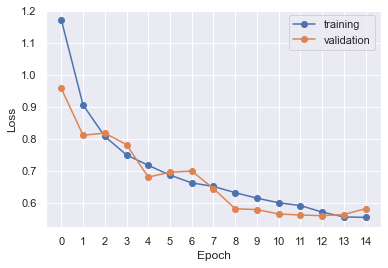

In [59]:
tf.random.set_seed(1234)

model = build_my_model(average_over_positions=False,
                               input_size = 5000,
                               input_length = 500,
                               embedding_dim = 16)
history = model.fit(
  x = X_train_tighter,    # our sparse padded training data
  y = y_train,          # corresponding binary labels
  epochs=15,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

history = pd.DataFrame(history.history)
plot_history(history)

#model.evaluate(X_test_small, Y_test)

In [89]:
# Baseline - Logistic Regression with all columns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import random

random.seed(000)
logit = LogisticRegression(penalty='l2',max_iter=5000,random_state=111)
logit_score = cross_validate(logit,X_train_new_features,y_train,cv=3,return_train_score=True)

print("Train accuracy:",np.mean(logit_score['train_score']))
print("Valid accuracy:",np.mean(logit_score['test_score']))

Train accuracy: 0.7069444444444445
Valid accuracy: 0.6422619047619048


In [70]:
# Random Forest with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random

random.seed(111)
# Base learner
rfr = RandomForestClassifier()

# Hyperparameters
param_dist = {
    "n_estimators":range(500,750,1000),
    "max_depth":range(8,15),
    #"max_features":[0.2,0.3,0.5,'sqrt']
   #"min_samples_split":[2,5,10],
    #"min_samples_leaf":[1,2,4]
}

rf_random = GridSearchCV(
    estimator=rfr,
    param_grid=param_dist,
    cv = 5,
    n_jobs=4
)

rf_random.fit(X_train_new_features,y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)

{'max_depth': 14, 'n_estimators': 500}
0.7712301587301587


In [80]:
rf.fit(X_train_new_features,y_train)
feature_importance = pd.DataFrame(rf.feature_importances_,index=X_train_new_features.columns,columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

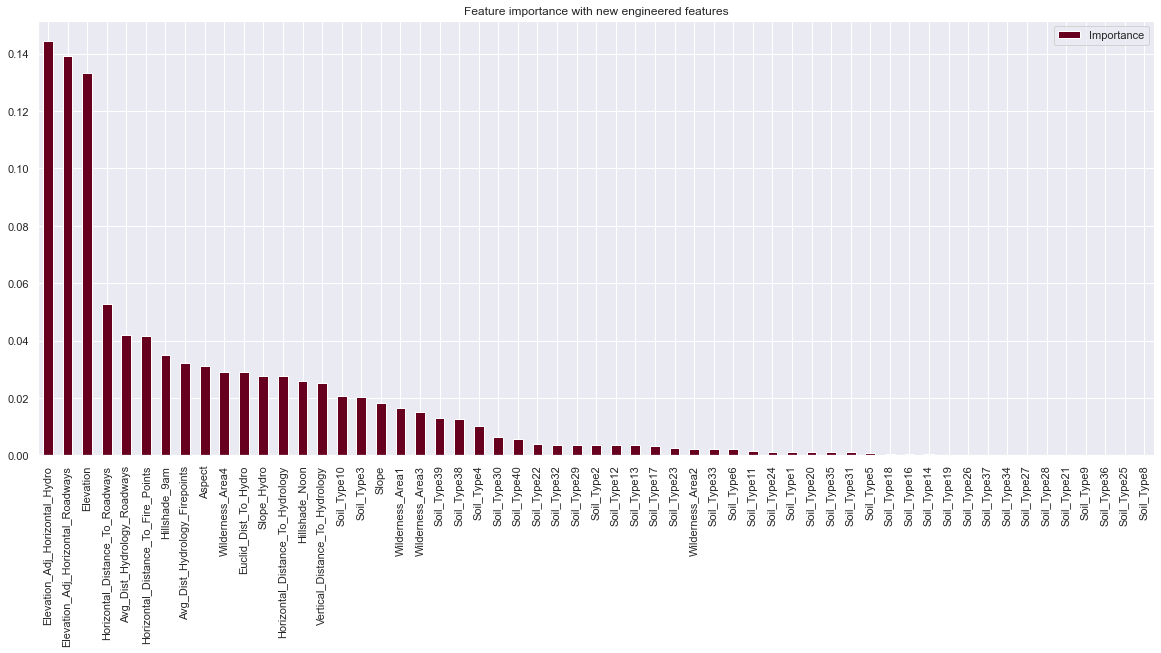

In [88]:
# All engineered features are in top 10
feature_importance.plot(kind='bar',figsize=(20,8),cmap=plt.cm.RdBu)
plt.title("Feature importance with new engineered features")
plt.show()